In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s5e9/sample_submission.csv
/kaggle/input/playground-series-s5e9/train.csv
/kaggle/input/playground-series-s5e9/test.csv


# Data Exploration

In [2]:
train_df = pd.read_csv('/kaggle/input/playground-series-s5e9/train.csv')
test_df = pd.read_csv('/kaggle/input/playground-series-s5e9/test.csv')
sample_df = pd.read_csv('/kaggle/input/playground-series-s5e9/sample_submission.csv')

In [3]:
train_df.sample(5)

,id,RhythmScore,AudioLoudness,VocalContent,AcousticQuality,InstrumentalScore,LivePerformanceLikelihood,MoodScore,TrackDurationMs,Energy,BeatsPerMinute
298060,298060,0.446401,-6.843999,0.107439,0.405435,0.414895,0.251402,0.859551,386442.8829,0.183867,105.69261
509848,509848,0.562939,-4.092095,0.148833,0.396578,0.000001,0.305419,0.611149,63973.0000,0.243600,118.83806
257619,257619,0.648711,-5.273048,0.023500,0.258887,0.087113,0.302966,0.285639,249404.5887,0.378467,122.05044
92583,92583,0.912904,-6.945576,0.023500,0.000005,0.076821,0.076163,0.737109,162348.0204,0.383733,106.24385
195801,195801,0.657465,-15.755396,0.109011,0.161349,0.228079,0.151025,0.978000,241697.0781,0.242267,78.73213


In [4]:
test_df.sample(3)

,id,RhythmScore,AudioLoudness,VocalContent,AcousticQuality,InstrumentalScore,LivePerformanceLikelihood,MoodScore,TrackDurationMs,Energy
46826,570990,0.552935,-8.125633,0.032993,0.678938,0.376901,0.131167,0.458525,124786.9256,0.168933
37333,561497,0.641616,-14.622173,0.023500,0.410905,0.012099,0.173494,0.367984,357055.1658,0.147867
102489,626653,0.975000,-6.351761,0.058488,0.508626,0.362446,0.235900,0.381938,273474.9144,0.749667


In [5]:
sample_df.sample(2)

,id,BeatsPerMinute
8768,532932,119.035
154797,678961,119.035


# Data Transformation, Analysis and Model Building on Training Data

In [6]:
train_df.shape

(524164, 11)

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524164 entries, 0 to 524163
Data columns (total 11 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         524164 non-null  int64  
 1   RhythmScore                524164 non-null  float64
 2   AudioLoudness              524164 non-null  float64
 3   VocalContent               524164 non-null  float64
 4   AcousticQuality            524164 non-null  float64
 5   InstrumentalScore          524164 non-null  float64
 6   LivePerformanceLikelihood  524164 non-null  float64
 7   MoodScore                  524164 non-null  float64
 8   TrackDurationMs            524164 non-null  float64
 9   Energy                     524164 non-null  float64
 10  BeatsPerMinute             524164 non-null  float64
dtypes: float64(10), int64(1)
memory usage: 44.0 MB


In [8]:
train_df.isnull().sum()

id                           0
RhythmScore                  0
AudioLoudness                0
VocalContent                 0
AcousticQuality              0
InstrumentalScore            0
LivePerformanceLikelihood    0
MoodScore                    0
TrackDurationMs              0
Energy                       0
BeatsPerMinute               0
dtype: int64

## Data Visualization

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

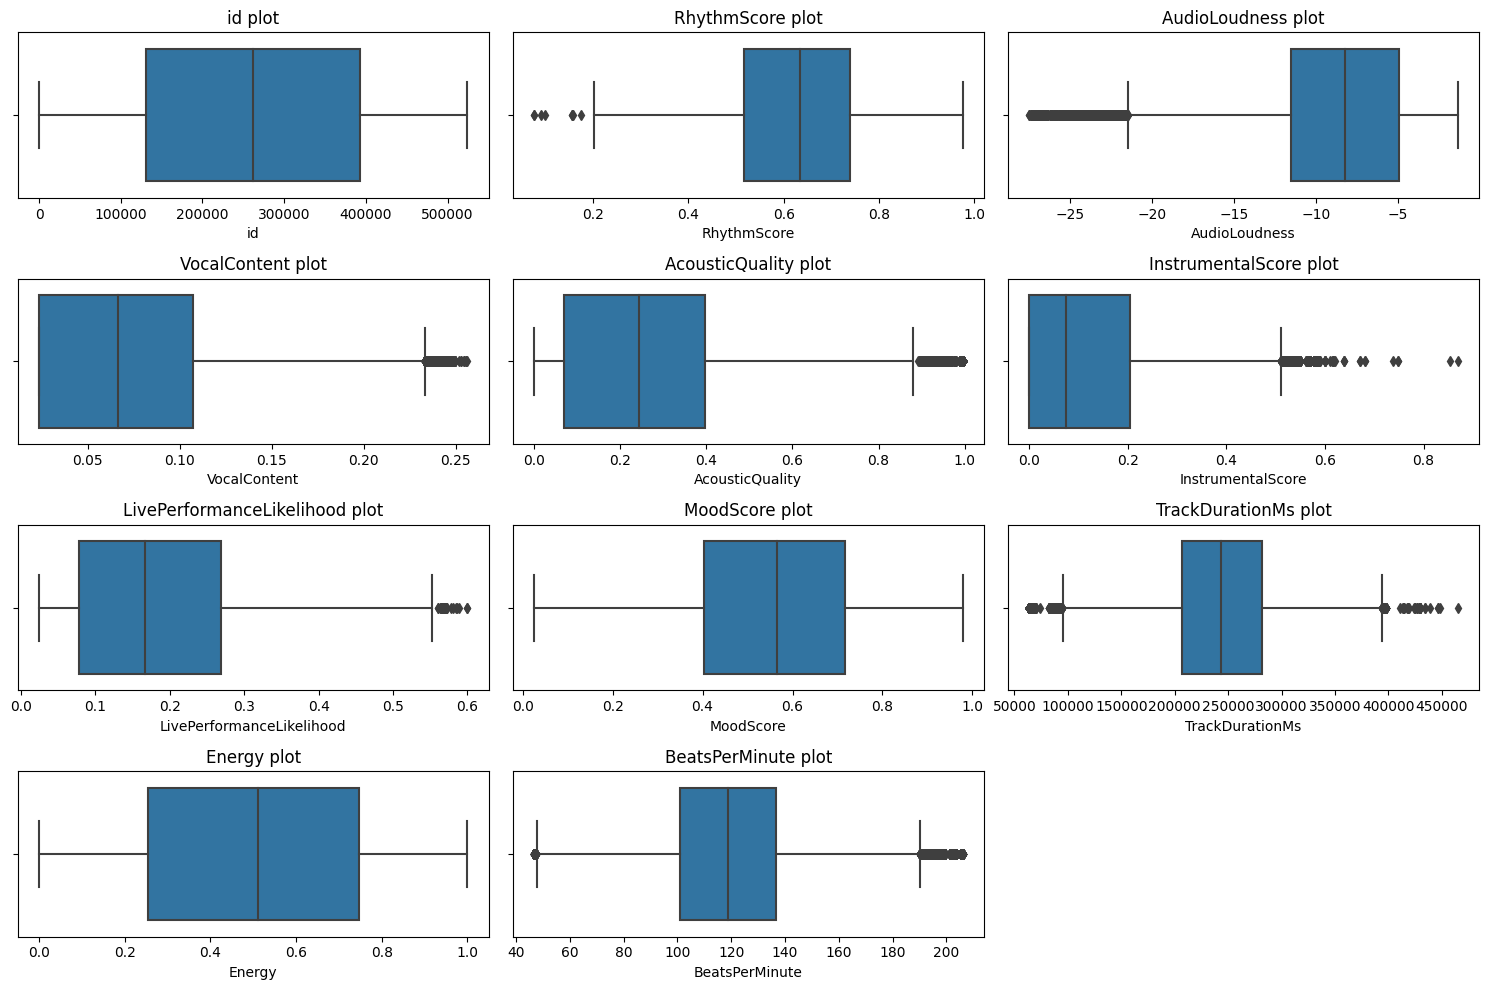

In [10]:
def boxplot(data):
    num_cols = train_df.select_dtypes(exclude = 'O').columns
    for i, j in enumerate(num_cols):
        plt.subplot(len(num_cols)//3+1, 3, i+1 )
        sns.boxplot(data = data, x = j)
        plt.title(f"{j} plot")
    plt.tight_layout()

plt.figure(figsize = (15, 10))
boxplot(train_df)

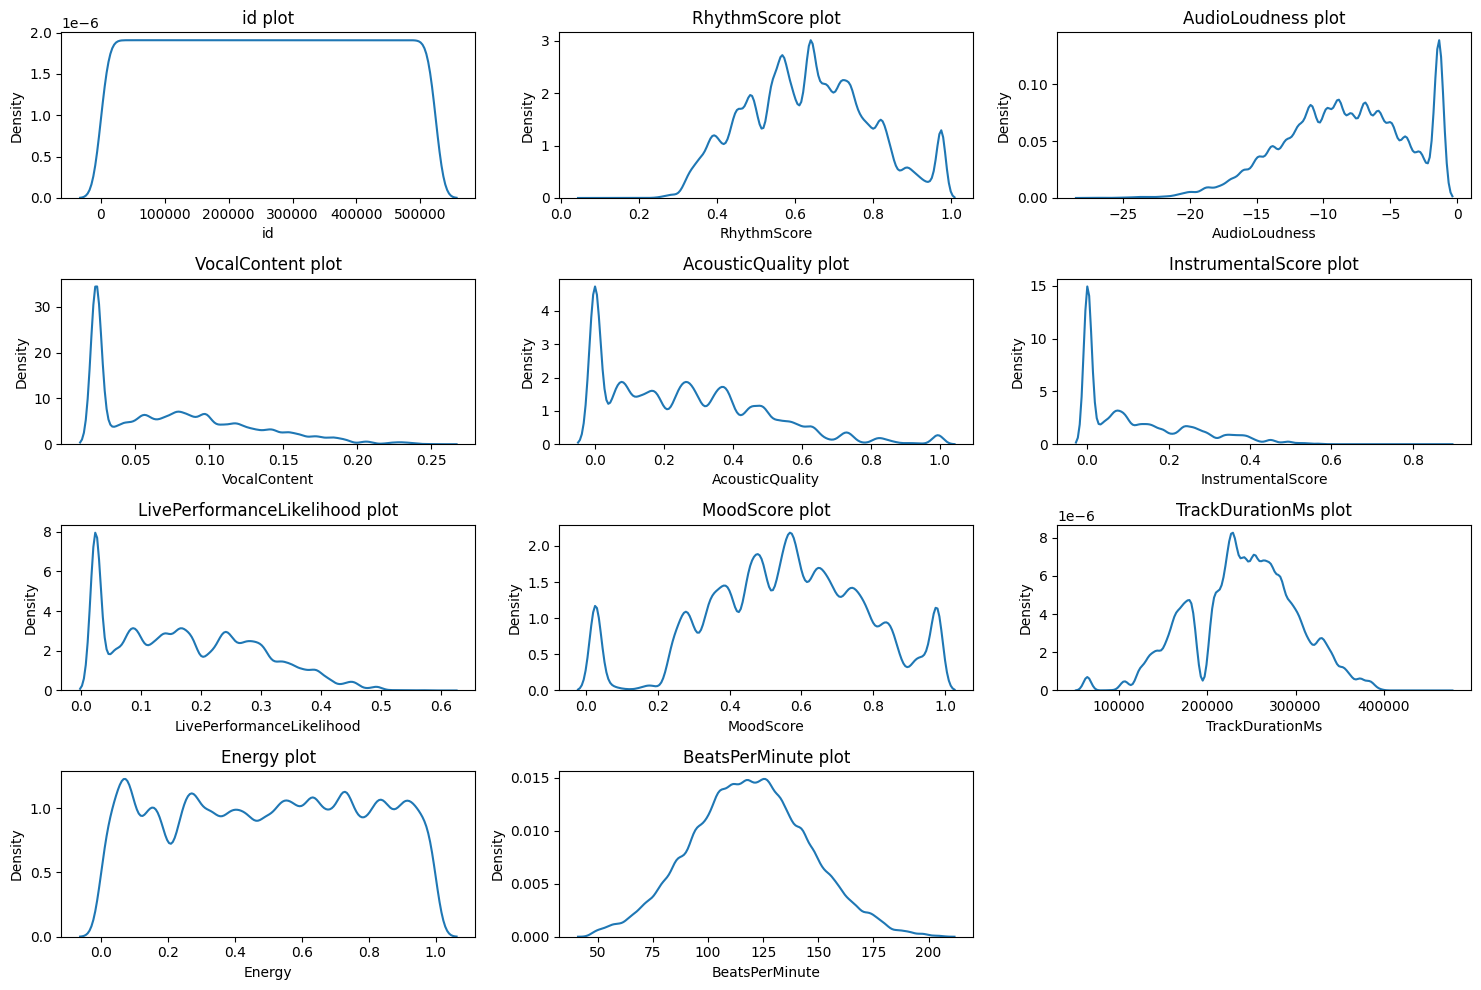

In [11]:
def kdeplot(data):
    num_cols = train_df.select_dtypes(exclude = 'O').columns
    for i, j in enumerate(num_cols):
        plt.subplot(len(num_cols)//3+1, 3, i+1 )
        sns.kdeplot(data = data, x = j)
        plt.title(f"{j} plot")
    plt.tight_layout()

plt.figure(figsize = (15, 10))
kdeplot(train_df)

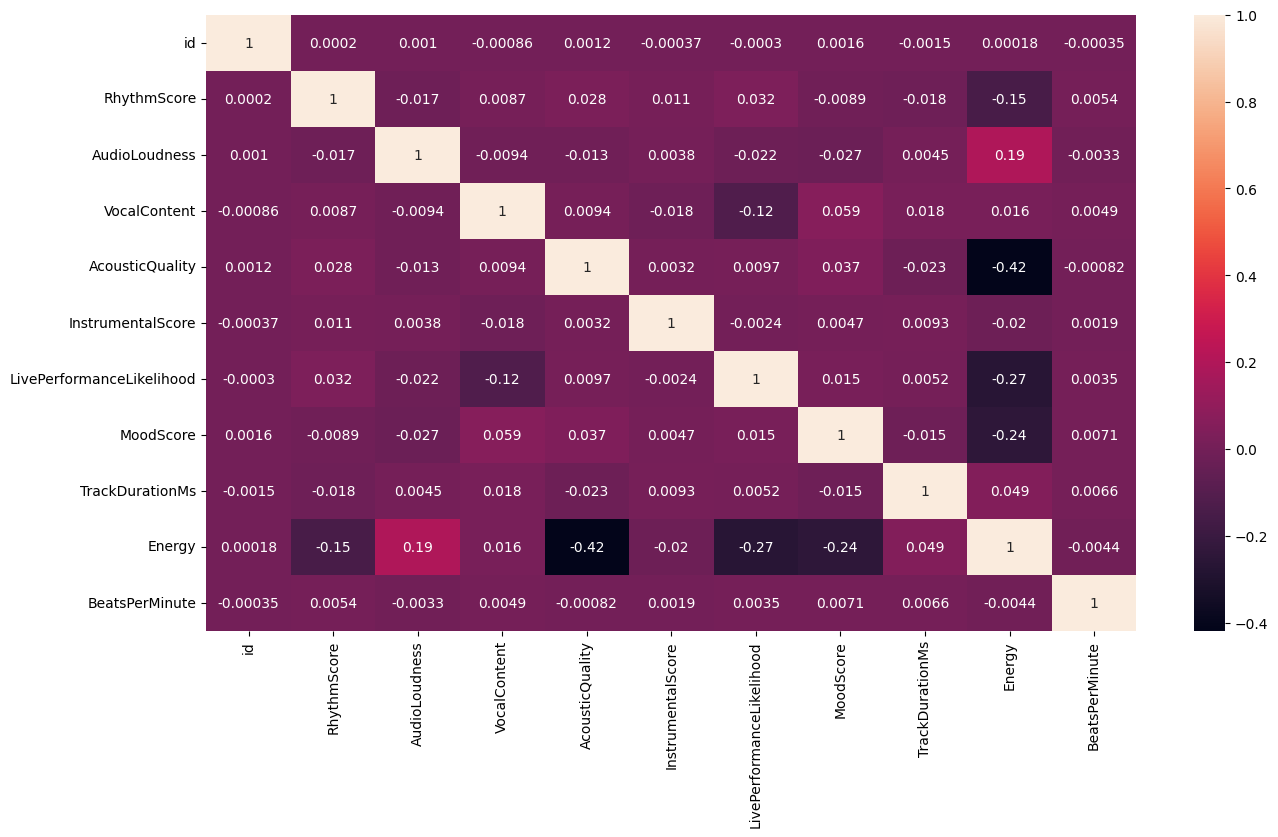

In [12]:
plt.figure(figsize = (15, 8))
sns.heatmap(train_df.corr(), annot = True)
plt.show()

In [13]:
train_df = train_df.drop('id', axis = 1)

# Train Test Split and Data Preprocessing

In [14]:
!pip install scikit-learn==1.6.3 --quiet --force-reinstall
!pip install --upgrade scikeras --quiet


ERROR: Could not find a version that satisfies the requirement scikit-learn==1.6.3 (from versions: 0.9, 0.10, 0.11, 0.12, 0.12.1, 0.13, 0.13.1, 0.14, 0.14.1, 0.15.0, 0.15.1, 0.15.2, 0.16.0, 0.16.1, 0.17, 0.17.1, 0.18, 0.18.1, 0.18.2, 0.19.0, 0.19.1, 0.19.2, 0.20.0, 0.20.1, 0.20.2, 0.20.3, 0.20.4, 0.21.1, 0.21.2, 0.21.3, 0.22, 0.22.1, 0.22.2.post1, 0.23.0, 0.23.1, 0.23.2, 0.24.0, 0.24.1, 0.24.2, 1.0, 1.0.1, 1.0.2, 1.1.0, 1.1.1, 1.1.2, 1.1.3, 1.2.0rc1, 1.2.0, 1.2.1, 1.2.2, 1.3.0rc1, 1.3.0, 1.3.1, 1.3.2, 1.4.0rc1, 1.4.0, 1.4.1.post1, 1.4.2, 1.5.0rc1, 1.5.0, 1.5.1, 1.5.2, 1.6.0rc1, 1.6.0, 1.6.1, 1.7.0rc1, 1.7.0, 1.7.1, 1.7.2)
ERROR: No matching distribution found for scikit-learn==1.6.3
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 107.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
category-encoders 2.7.0 requires scikit-learn<1.6.0,>=1

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = train_df.drop('BeatsPerMinute', axis = 1)
y = train_df.BeatsPerMinute

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.85, random_state = 42)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
X_train_scaled

array([[-1.37647551,  0.96406738, -1.0204179 , ...,  0.40944297,
        -0.3572022 , -0.60068506],
       [-0.85914501, -1.47952127,  0.18371833, ..., -0.83057451,
         0.31888014,  1.60925364],
       [ 1.3274902 , -0.80472761, -0.74029683, ...,  1.87244095,
        -0.5736188 , -1.62863304],
       ...,
       [-0.50248799, -0.58663989, -0.45129158, ..., -0.0947712 ,
        -0.10683193,  0.89789801],
       [ 2.1817851 , -1.6547608 , -0.07456816, ...,  1.79111518,
         0.37497195, -1.47459028],
       [-0.44161901, -2.17951522, -0.44012402, ..., -0.81235969,
         0.96704548, -0.3834158 ]])

# Building ANN Regression model

In [17]:
import tensorflow
from tensorflow import keras 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential([
    Dense(128, input_shape = (X_train_scaled.shape[1],), activation = 'relu'),
    Dense(64, activation = 'relu'),
    Dense(32, activation = 'relu'),
    Dense(1)
])

model.compile(optimizer = 'adam', loss = 'mse', metrics = [keras.metrics.RootMeanSquaredError(name="rmse")])
early_stopping = EarlyStopping(monitor = "val_loss", restore_best_weights = True, patience = 35)

history = model.fit(X_train_scaled, y_train, 
                   validation_data = (X_test_scaled, y_test),
                   callbacks = [early_stopping],
                   verbose = 1,
                   epochs = 100)

2025-09-29 19:36:57.557464: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1759174617.731523      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1759174617.784146      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
I0000 00:00:1759174629.766466      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


Epoch 1/100


I0000 00:00:1759174632.985897      74 service.cc:148] XLA service 0x7f9688009790 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1759174632.986443      74 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1759174633.212020      74 cuda_dnn.cc:529] Loaded cuDNN version 90300


   73/13924 ━━━━━━━━━━━━━━━━━━━━ 29s 2ms/step - loss: 14162.1709 - rmse: 118.9795

I0000 00:00:1759174633.848027      74 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


13924/13924 ━━━━━━━━━━━━━━━━━━━━ 38s 3ms/step - loss: 1197.0040 - rmse: 32.9677 - val_loss: 705.1108 - val_rmse: 26.5539
Epoch 2/100
13924/13924 ━━━━━━━━━━━━━━━━━━━━ 33s 2ms/step - loss: 710.2368 - rmse: 26.6502 - val_loss: 708.6676 - val_rmse: 26.6208
Epoch 3/100
13924/13924 ━━━━━━━━━━━━━━━━━━━━ 33s 2ms/step - loss: 709.3495 - rmse: 26.6336 - val_loss: 704.7570 - val_rmse: 26.5473
Epoch 4/100
13924/13924 ━━━━━━━━━━━━━━━━━━━━ 32s 2ms/step - loss: 708.5516 - rmse: 26.6185 - val_loss: 704.5242 - val_rmse: 26.5429
Epoch 5/100
13924/13924 ━━━━━━━━━━━━━━━━━━━━ 33s 2ms/step - loss: 710.0241 - rmse: 26.6461 - val_loss: 704.4592 - val_rmse: 26.5416
Epoch 6/100
13924/13924 ━━━━━━━━━━━━━━━━━━━━ 33s 2ms/step - loss: 706.7907 - rmse: 26.5855 - val_loss: 709.1677 - val_rmse: 26.6302
Epoch 7/100
13924/13924 ━━━━━━━━━━━━━━━━━━━━ 32s 2ms/step - loss: 704.4630 - rmse: 26.5415 - val_loss: 714.7701 - val_rmse: 26.7352
Epoch 8/100
13924/13924 ━━━━━━━━━━━━━━━━━━━━ 33s 2ms/step - loss: 707.3796 - rmse: 26.5

# HyperParameter Tuning of ANN Regression model

In [18]:
# !pip install scikeras

In [19]:
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import RandomizedSearchCV, KFold
from tensorflow.keras.optimizers import Adam, RMSprop

def build_model(n_hidden1 = 128, n_hidden2 = 64, n_hidden3 = 32, activation = 'relu', learning_rate = 0.001, optimizer = 'adam'):
    model = Sequential([
        Dense(n_hidden1, input_shape = (X_train_scaled.shape[1],), activation = activation),
        Dense(n_hidden2, activation = activation),
        Dense(n_hidden3, activation = activation),
        Dense(1)
    ])

    if optimizer == 'adam':
        opt = Adam(learning_rate = learning_rate)
    elif optimizer == 'rmsprop':
        opt = RMSprop(learning_rate = learning_rate)
    else:
        raise ValueError(f"Unsupported optimizer: {optimizer}")
        
    model.compile(
        optimizer = opt,
        loss = 'mse',
        metrics = [keras.metrics.RootMeanSquaredError(name = 'rmse')]
    )
    return model


# Wrap with KerasRegressor
regressor = KerasRegressor(model = build_model, verbose = 0)

# defining parameter grid
param_grid = {
    "model__n_hidden1": [64, 128],
    "model__n_hidden2": [32, 64],
    "model__n_hidden3": [16],
    "model__activation": ["relu", "elu"], 
    "model__learning_rate": [0.001],
    "batch_size": [64],
    "epochs": [20, 30]
}

random_cv = RandomizedSearchCV(estimator = regressor, param_distributions = param_grid, cv = 2, scoring = 'neg_root_mean_squared_error', verbose = 1, n_jobs = -1, random_state = 42)
early_stopping = EarlyStopping(monitor = "val_loss", restore_best_weights = True, patience = 35)

random_cv.fit(X_train_scaled, y_train, 
            validation_data = (X_test_scaled, y_test), 
            callbacks = [early_stopping])

Fitting 2 folds for each of 10 candidates, totalling 20 fits


2025-09-29 20:08:04.098982: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-09-29 20:08:04.100859: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-09-29 20:08:04.100875: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1759176484.134207    1488 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1759176484.139998    1487 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:17591764

,estimator,KerasRegresso...se epochs=1 )
,param_distributions,"{'batch_size': [64], 'epochs': [20, 30], 'model__activation': ['relu', 'elu'], 'model__learning_rate': [0.001], ...}"
,n_iter,10
,scoring,'neg_root_mean_squared_error'
,n_jobs,-1
,refit,True
,cv,2
,verbose,1
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [20]:
print("Best Parameters:", random_cv.best_params_)
print("Best Score:", -random_cv.best_score_)  # convert negative RMSE to positive
best_model = random_cv.best_estimator_.model_

Best Parameters: {'model__n_hidden3': 16, 'model__n_hidden2': 64, 'model__n_hidden1': 64, 'model__learning_rate': 0.001, 'model__activation': 'elu', 'epochs': 30, 'batch_size': 64}
Best Score: 26.468684579771786


# Prediction on Test data

In [21]:
test_df.sample(5)

,id,RhythmScore,AudioLoudness,VocalContent,AcousticQuality,InstrumentalScore,LivePerformanceLikelihood,MoodScore,TrackDurationMs,Energy
66285,590449,0.955791,-7.957100,0.085829,0.341311,0.086879,0.114769,0.441208,370176.8395,0.092867
46491,570655,0.523924,-3.813132,0.023500,0.267727,0.167862,0.390101,0.423818,158063.9989,0.596933
61375,585539,0.686762,-10.904381,0.186100,0.447895,0.142227,0.104036,0.846455,246068.3931,0.051467
163574,687738,0.826732,-7.967510,0.136569,0.000005,0.015767,0.024300,0.497760,241721.4404,0.737800
140292,664456,0.561616,-11.174918,0.068699,0.060656,0.253651,0.411835,0.648934,270550.8749,0.561733


In [22]:
# Data Preprocessing
test_df_scaled = scaler.transform(test_df.drop('id', axis = 1))

test_df_scaled[0]

array([-1.42043309, -1.82336104, -1.0204179 , -0.13438412, -0.79598948,
        0.78813702,  0.48140404,  1.0277668 , -0.26271066])

In [23]:
y_pred = best_model.predict(test_df_scaled)
y_pred

5461/5461 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step


array([[119.38916 ],
       [119.577065],
       [119.5647  ],
       ...,
       [119.08811 ],
       [119.197586],
       [119.871635]], dtype=float32)

# Submission

In [24]:
test_df.id

0         524164
1         524165
2         524166
3         524167
4         524168
           ...  
174717    698881
174718    698882
174719    698883
174720    698884
174721    698885
Name: id, Length: 174722, dtype: int64

In [25]:
y_pred.flatten()

array([119.38916 , 119.577065, 119.5647  , ..., 119.08811 , 119.197586,
       119.871635], dtype=float32)

In [26]:
submission = pd.DataFrame({"id": test_df.id,
                           "BeatsPerMinute": y_pred.flatten()})

submission


,id,BeatsPerMinute
0,524164,119.389160
1,524165,119.577065
2,524166,119.564697
3,524167,120.119423
4,524168,119.868912
...,...,...
174717,698881,119.835815
174718,698882,119.739975
174719,698883,119.088112
174720,698884,119.197586


In [27]:
submission.to_csv('submission.csv', index = False)
print("Sucessfully saved!")

Sucessfully saved!
